
# Google Landmark Recognition Challenge

### by-
   ### Sufiyan Adhikari (173190009)
   ### Jaswant Singh    (173190020)
   ### Khyati Thakkar   (173194001)


In [1]:
import pandas as pd
train = pd.read_csv("data/train.csv")
train.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


# Data Handling

### Data Sampling

As Data size is Huge and Data is [Highly Skewed](https://www.kaggle.com/codename007/a-very-extensive-landmark-exploratory-analysis),  
Sampling was required to make sure everything works before training on whole data.

train: 336 GB with 1,220,165 images 
test: 34.9 GB with 116,163 images

Data was downloaded [with]() this script, reducing the resolution to *299* from *1600*
as demonstrated 

In [2]:
def show_count(train):
    temp = pd.DataFrame(train.landmark_id.value_counts())
    temp.reset_index(inplace=True)
    temp.columns = ['landmark_id','count1']
    temp = pd.DataFrame(temp.count1.value_counts())
    temp = temp.sort_index()
    temp.reset_index(inplace=True)
    temp.columns = ["Photos","Id Count"]
    print("Landmark IDs with Very Few Photos: \n")
    print(temp.head())
    print("\n\nLandmarks IDs with Very High Number of Photos \n")
    print(temp.tail())
show_count(train)

Landmark IDs with Very Few Photos: 

   Photos  Id Count
0       1       164
1       2       303
2       3       632
3       4      1022
4       5      1308


Landmarks IDs with Very High Number of Photos 

     Photos  Id Count
774   13208         1
775   18328         1
776   23261         1
777   49880         1
778   50079         1


In [3]:
!ls data

models		       train	       train_30_4.csv  train_40.csv
planet		       train_100       train_30_5.csv  train.csv
sample_submission.csv  train_100.csv   train_30_6.csv  train_val_100_10.pkl
temp_1		       train_30_0.csv  train_30_7.csv  train_val_30_10.pkl
test		       train_30_1.csv  train_30_8.csv  train_val_30_5.pkl
test.csv	       train_30_2.csv  train_30.csv    train_val_40_10.pkl
tmp		       train_30_3.csv  train_40


In [4]:
import os
HOME = os.getenv("HOME")

### Reducing Train Data and Extracting Validation Data
As we can see above, 159 Landmark IDs have only 1 photo, 259 have only 2 photos, etc.
where as, a few IDs have photos in excess of several thousand.
The Below function was written to take in the original train.csv file and reduce it to include maximum *trn_sz* photos of each landmark for training, and also generate maximum *val_sz* of validation photo indexes of each landmark if it has more than *trn*sz* photos and save it in a python list as required by **fastai** library

It Dumps these into a pickle file with name train_val_<trn_sz>_<val_sz>.pkl

and can be imported as *train, val_idxs = joblib.load(filename)*

missing_in_train = []
for i, row in train.iterrows():
    filename = f'{HOME}/data/train/{row["id"]}.jpg'
    if not os.path.exists(filename): 
        missing_in_train.append(i)
    elif 0 == os.path.getsize(filename):
        #Deleting the empty files
        os.unlink(filename)
        missing_in_train.append(i)
print("Number of Photos Not Downloaded: ", len(missing_in_train))

os.chdir(HOME)
train.drop(index=missing_in_train, inplace=True)
train.to_csv("data/train.csv", index=False)

In [11]:
def generate_train_val_set(trn_sz=None, val_sz=5):
    if trn_sz==None:
        print("Train Size Not given. Exiting Train Set Generation!!!")        
        return()        

    import os
    import numpy as np 
    import pandas as pd
    from sklearn.externals import joblib #used for pickle file handeling    
    cur_dir=os.getcwd()
    os.chdir(f'{HOME}/data')    
    filename=f'train_val_{trn_sz}_{val_sz}.pkl'
    if os.path.exists(filename):
        print(f'Train and Validation Data with trn_sz={trn_sz}, val_sz={val_sz} already exists:')
        return()
    train = pd.read_csv('train.csv')
    print("Actual Training Data Size: ",train_data.shape)
    max_count=dict(train_data.landmark_id.value_counts())
    keys = max_count.keys()
    
    new_train=[]
    counter_dict = {}
    for key in keys: counter_dict[key] = 0
    #Validation Set is only defined as indexes of train.csv
    val_idxs=[]
    for i, row in train.iterrows():
        key = row['landmark_id']
        if counter_dict[key] < trn_sz:
            new_train.append(row.values)
            counter_dict[key] = counter_dict[key]+1
        elif counter_dict[key] < trn_sz+val_sz:
            new_train.append(row.values)
            counter_dict[key] = counter_dict[key]+1
            val_idxs.append(len(new_train)-1)
    new_train = pd.DataFrame(new_train, columns = train.columns)
    new_train.drop('url', inplace=True, axis=1)
    new_train.to_csv(f'train_{trn_sz}.csv', index=False)   
    filename=f'train_val_{trn_sz}_{val_sz}.pkl'
    joblib.dump((new_train, val_idxs), filename)
    print(f'Train Dataframe and Val_idxs dumped to {filename}')
    print(f'Train Data also saved to train_{trn_sz}.csv')
    return()

In [12]:
os.chdir("data")
train_data = pd.read_csv('train.csv')
print("Actual Training Data Size: ",train_data.shape)
temp=pd.DataFrame(train_data.landmark_id.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
os.chdir(HOME)

Actual Training Data Size:  (1217714, 3)


In [13]:
a = pd.DataFrame([[1, 2], [3, 4]], columns=['f', 's'])
dict(a.f.value_counts())

{3: 1, 1: 1}

In [14]:
train_data = pd.read_csv('data/train.csv')
print("Actual Training Data Size: ",train_data.shape)
temp=pd.DataFrame(train_data.landmark_id.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp.head()

Actual Training Data Size:  (1217714, 3)


,landmark_id,count
0,9633,50079
1,6051,49880
2,6599,23261
3,9779,18328
4,2061,13208


In [15]:
train.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


In [16]:
train = pd.read_csv("data/train.csv")

## Training Starts Here

In [17]:
trn_sz = 40
parts = 4

In [18]:
generate_train_val_set(trn_sz=trn_sz, val_sz=10)

Train and Validation Data with trn_sz=40, val_sz=10 already exists:


()

In [19]:
os.chdir(HOME)
from sklearn.externals import joblib #used for pickle file handeling    
train, val_idxs = joblib.load("data/train_val_30_10.pkl")

In [20]:
os.chdir(HOME)
train = pd.read_csv(f"data/train_{trn_sz}.csv")

In [21]:
train.head()

,id,landmark_id
0,cacf8152e2d2ae60,4676
1,0a58358a2afd3e4e,6651
2,6b2bb500b6a38aa0,11284
3,b399f09dee9c3c67,8429
4,19ace29d77a5be66,6231


In [22]:
#Shuffle the rows
train = train.sample(frac=1).reset_index(drop=True)

In [23]:
import numpy as np
temp = train.shape[0]-1
sz_ls = [int(i*temp) for i in np.linspace(0, 1, num=parts ,endpoint=True)]

In [24]:
if not os.path.exists(f"data/train_{trn_sz}"):
    os.mkdir(f"data/train_{trn_sz}")
for i in range(len(sz_ls)-1):
    train.iloc[sz_ls[i]:sz_ls[i+1], :].to_csv(f'data/train_{trn_sz}/train_{trn_sz}_{i}.csv', index=False)

In [25]:
#To add fastai to system path
import sys
sys.path.append(f'{HOME}/fastai')



# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = f'{HOME}/data'
sz=64
f_model = resnet34
bs=36


In [26]:
torch.cuda.is_available()

True

In [27]:
#for i in range(3):
os.chdir(f'{HOME}/data')
i=0
label_csv = f'{PATH}/train_{trn_sz}/train_{trn_sz}_{i}.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=bs, tfms=tfms,
                                    suffix='.jpg', val_idxs=val_idxs, test_name='test')
learn = ConvLearner.pretrained(f_model, data, precompute=True)
    

100%|██████████| 612/612 [00:49<00:00, 12.46it/s]


 86%|████████▋ | 2110/2445 [00:29<00:04, 72.67it/s, loss=38.2]

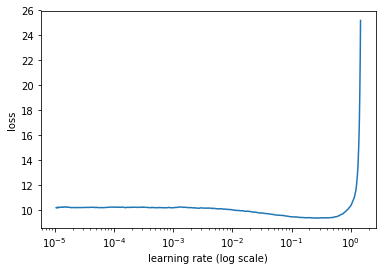

In [28]:
lrf=learn.lr_find()
learn.sched.plot()

In [33]:
lr = 0.01

In [30]:
learn.fit(lr, 1)

  0%|          | 2/2445 [00:00<02:32, 15.97it/s, loss=10.5]
epoch      trn_loss   val_loss   accuracy                     
    0      7.659976   7.147836   0.062182  



[array([7.14784]), 0.06218181942843578]

In [31]:
def get_data(i):
    label_csv = f'{PATH}/train_{trn_sz}/train_{trn_sz}_{i}.csv'
    n = len(list(open(label_csv)))-1
    val_idxs = get_cv_idxs(n)
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=bs, tfms=tfms,
                                        suffix='.jpg', val_idxs=val_idxs, test_name='test')
    return (data)
    
learn = ConvLearner.pretrained(f_model, data, precompute=True)
for i in range(parts):
    learn.set_data(get_data(i))
    learn.fit(lr, 1)

epoch      trn_loss   val_loss   accuracy                     
    0      7.616468   7.10036    0.063136  



epoch      trn_loss   val_loss   accuracy                     
    0      6.397636   6.180018   0.131182  



epoch      trn_loss   val_loss   accuracy                     
    0      5.485837   5.76505    0.177182  



epoch      trn_loss   val_loss   accuracy                     
    0      4.89109    5.572054   0.202045  



In [32]:
learn.save(f'model_{sz}')